### Смиирнов Николай M3303, Коняхин Всеволод M3305
### Методы оптимизации. LU-Разложение

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix, dok_matrix, lil_matrix

### Имплементация

In [2]:
from methods import get_LU, solve_system, get_inverse
from sparse_methods import get_LU_sparse, solve_system_sparse, get_inverse_sparse

### LU Decomposition-test

In [3]:
A = np.array([
    [1, 2, 3, 1, 2, 1], 
    [0, 1, 0, 6, -1, 0], 
    [2, 3, 1, -1, -2, -1], 
    [7, 2, 6, 0, 2, 11], 
    [1, 0, -2, 1, 4, 3], 
    [1, -5, 3, -4, 2, 0], 
])

L1, U1 = get_LU(A)

In [4]:
pd.DataFrame(L1)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,1.0,0.0,0.000000,0.000000,0.0
2,2.0,-1.0,1.0,0.000000,0.000000,0.0
3,7.0,-12.0,3.0,1.000000,0.000000,0.0
4,1.0,-2.0,1.0,0.160714,1.000000,0.0
5,1.0,-7.0,-0.0,0.660714,-0.670644,1.0


In [5]:
pd.DataFrame(U1)

,0,1,2,3,4,5
0,1.0,2.0,3.0,1.0,2.000000,1.000000
1,0.0,1.0,0.0,6.0,-1.000000,0.000000
2,0.0,0.0,-5.0,3.0,-7.000000,-3.000000
3,0.0,0.0,0.0,56.0,-3.000000,13.000000
4,0.0,0.0,0.0,0.0,7.482143,2.910714
5,0.0,0.0,0.0,0.0,0.000000,-7.637232


In [6]:
L1 @ U1

array([[ 1.,  2.,  3.,  1.,  2.,  1.],
       [ 0.,  1.,  0.,  6., -1.,  0.],
       [ 2.,  3.,  1., -1., -2., -1.],
       [ 7.,  2.,  6.,  0.,  2., 11.],
       [ 1.,  0., -2.,  1.,  4.,  3.],
       [ 1., -5.,  3., -4.,  2.,  0.]])

### LU Decomposition-test Sparse

In [7]:
L2, U2 = get_LU_sparse(csr_matrix(A))

In [8]:
pd.DataFrame(L2.todense())

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,1.0,0.0,0.000000,0.000000,0.0
2,2.0,-1.0,1.0,0.000000,0.000000,0.0
3,7.0,-12.0,3.0,1.000000,0.000000,0.0
4,1.0,-2.0,1.0,0.160714,1.000000,0.0
5,1.0,-7.0,0.0,0.660714,-0.670644,1.0


In [9]:
pd.DataFrame(U2.todense())

,0,1,2,3,4,5
0,1.0,2.0,3.0,1.0,2.000000,1.000000
1,0.0,1.0,0.0,6.0,-1.000000,0.000000
2,0.0,0.0,-5.0,3.0,-7.000000,-3.000000
3,0.0,0.0,0.0,56.0,-3.000000,13.000000
4,0.0,0.0,0.0,0.0,7.482143,2.910714
5,0.0,0.0,0.0,0.0,0.000000,-7.637232


In [10]:
L2.todense() @ U2.todense()

matrix([[ 1.,  2.,  3.,  1.,  2.,  1.],
        [ 0.,  1.,  0.,  6., -1.,  0.],
        [ 2.,  3.,  1., -1., -2., -1.],
        [ 7.,  2.,  6.,  0.,  2., 11.],
        [ 1.,  0., -2.,  1.,  4.,  3.],
        [ 1., -5.,  3., -4.,  2.,  0.]])

### Решение СЛАУ

In [11]:
A = np.array([
    [1, -1, 3, 1], 
    [4, -1, 5, 4],
    [2, -2, 4, 1],
    [1, -4, 5, -1]
])

b = np.array([5, 4, 6, 3])
gt_solution = np.array([9, 18, 10, -16])

In [12]:
solve_system(A, b)

array([  9.,  18.,  10., -16.])

In [13]:
solve_system_sparse(A, b).todense()

matrix([[  9.],
        [ 18.],
        [ 10.],
        [-16.]])

#### Random matrix

In [14]:
A_rand = np.random.rand(6, 6) * 10000
b_rand = np.random.rand(6) * 10000

In [15]:
b_rand

array([3539.77086852, 6664.13647486,  112.50033922,  494.23143706,
       5443.26171297, 2996.50191931])

In [16]:
x1 = solve_system(A_rand, b_rand)
x1

array([ 4.50804286, -3.12469556, -0.26224487,  1.46475111,  1.36559649,
       -1.20248095])

In [17]:
A_rand @ x1

array([3539.77086852, 6664.13647486,  112.50033922,  494.23143706,
       5443.26171297, 2996.50191931])

In [18]:
x2 = solve_system_sparse(A_rand, b_rand)
x2.todense()

matrix([[ 4.50804286],
        [-3.12469556],
        [-0.26224487],
        [ 1.46475111],
        [ 1.36559649],
        [-1.20248095]])

In [19]:
A_rand @ x2.todense()

matrix([[3539.77086852],
        [6664.13647486],
        [ 112.50033922],
        [ 494.23143706],
        [5443.26171297],
        [2996.50191931]])

### Inverse Matrix search

In [20]:
A = np.array([
    [2, 1, 1, 0],
    [3, 2, 0, 0],
    [1, 1, 3, 4],
    [2, -1, 2, 3]
])

In [21]:
A_inverse_1 = get_inverse(A)
A_inverse_1

array([[ 0.0625 ,  0.1875 , -0.1875 ,  0.25   ],
       [-0.09375,  0.21875,  0.28125, -0.375  ],
       [ 0.96875, -0.59375,  0.09375, -0.125  ],
       [-0.71875,  0.34375,  0.15625,  0.125  ]])

In [22]:
A @ A_inverse_1

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [26]:
A_inverse_2 = get_inverse_sparse(A)
A_inverse_2.todense()

matrix([[ 0.0625 ,  0.1875 , -0.1875 ,  0.25   ],
        [-0.09375,  0.21875,  0.28125, -0.375  ],
        [ 0.96875, -0.59375,  0.09375, -0.125  ],
        [-0.71875,  0.34375,  0.15625,  0.125  ]])

In [27]:
A @ A_inverse_2

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Task 3. Matrix generation based on `k`

In [267]:
def generate_eye_matrix(k):
    matrix = np.zeros((k, k))
    
    values_set = [0, -1, -2, -3, -4] 
    
    for i in range(k):
        for j in range(k):
            if i != j:
                matrix[i, j] = np.random.choice(values_set)
                
    for i in range(k):
        matrix[i, i] = matrix[i, :].sum() + 10 ** (-k)
                
    return matrix


def conduct_experiment(k, num_exp, generate_fn):
    solutions = list()
    errors = list()
    
    x = np.arange(k, dtype=float) + 1
    
    for i in range(num_exp):
        A = generate_fn(k)
        
        F = A @ x
        solution = solve_system(A, F)
                
        error = np.linalg.norm(x - solution)
        
        if np.isnan(error):
            error = 0.0
        
        errors.append(error)
        solutions.append(solution)
        
    best_solution = solutions[np.argmin(errors)]
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    
    return best_solution, mean_error, std_error


def conduct_experiments(list_of_ks, num_exps, generate_fn):
    agg_dict = dict(k=list(), mean_error=list(), std_error=list(), solution=list())

    for k in list_of_ks:
        solution, mean_error, std_error = conduct_experiment(k, num_exps, generate_fn)

        agg_dict['k'].append(k)
        agg_dict['mean_error'].append(mean_error)
        agg_dict['std_error'].append(std_error)
        agg_dict['solution'].append(solution)
        
        
    plt.plot(agg_dict['k'], agg_dict['mean_error'])
    plt.title('Зависимость нормы ошибки от числа обусловленности')
    plt.xlabel('K')
    plt.ylabel('Error norm')
    plt.show()

    df_to_show = pd.DataFrame.from_dict(agg_dict)
    df_to_show.set_index('k', inplace=True)
    
    return df_to_show

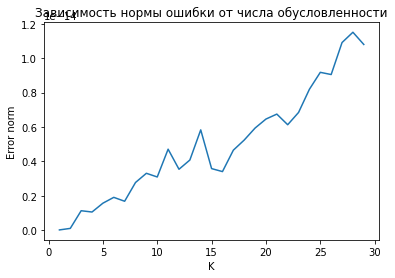

,mean_error,std_error,solution
k,,,
1,0.000000e+00,0.000000e+00,[1.0]
2,8.881784e-17,1.776357e-16,"[1.0, 2.0]"
3,1.117354e-15,6.251975e-16,"[0.9999999999999997, 2.0000000000000004, 3.000..."
4,1.042506e-15,5.373614e-16,"[1.0, 2.0, 3.0, 4.0]"
5,1.556549e-15,3.721389e-16,"[0.9999999999999997, 2.0000000000000004, 3.000..."
6,1.896577e-15,4.601251e-16,"[1.0000000000000002, 1.9999999999999998, 3.0, ..."
7,1.669430e-15,4.284356e-16,"[1.0000000000000004, 1.9999999999999998, 3.0, ..."
8,2.761608e-15,5.860748e-16,"[1.0, 1.9999999999999993, 3.0000000000000004, ..."
9,3.298132e-15,1.026571e-15,"[0.9999999999999998, 1.9999999999999987, 2.999..."


In [268]:
df_to_show = conduct_experiments(list(range(1, 30)), 5, generate_eye_matrix)
df_to_show

### Task 4. Gilbert matrix generation based on `k`

In [269]:
def generate_gilbert_matrix(k):
    matrix = np.zeros((k, k))
    
    for i in range(k):
        for j in range(k):
            matrix[i, j] = 1 / ((i+1) + (j+1) - 1)
            
    return matrix

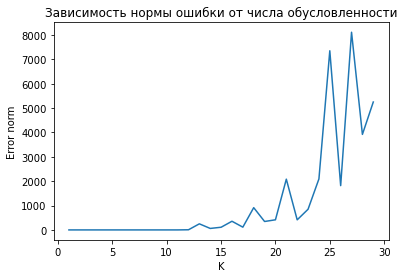

,mean_error,std_error,solution
k,,,
1,0.000000e+00,0.000000e+00,[1.0]
2,1.489520e-15,1.972152e-31,"[1.0000000000000007, 1.9999999999999987]"
3,1.489520e-15,1.972152e-31,"[1.0000000000000007, 1.9999999999999987, 3.0]"
4,2.430120e-12,0.000000e+00,"[0.9999999999999276, 2.000000000000806, 2.9999..."
5,1.919365e-11,0.000000e+00,"[1.0000000000001128, 1.999999999997835, 3.0000..."
6,3.442918e-09,0.000000e+00,"[0.999999999995608, 2.0000000001242566, 2.9999..."
7,1.149105e-08,0.000000e+00,"[0.999999999999158, 1.9999999999806435, 3.0000..."
8,3.270079e-06,0.000000e+00,"[1.0000000001563363, 1.9999999916361237, 3.000..."
9,3.032138e-04,0.000000e+00,"[1.0000000028206424, 1.9999998066929483, 3.000..."


In [270]:
df_to_show = conduct_experiments(list(range(1, 30)), 5, generate_gilbert_matrix)
df_to_show

### Выводы